# pynq 协同microblaze演示
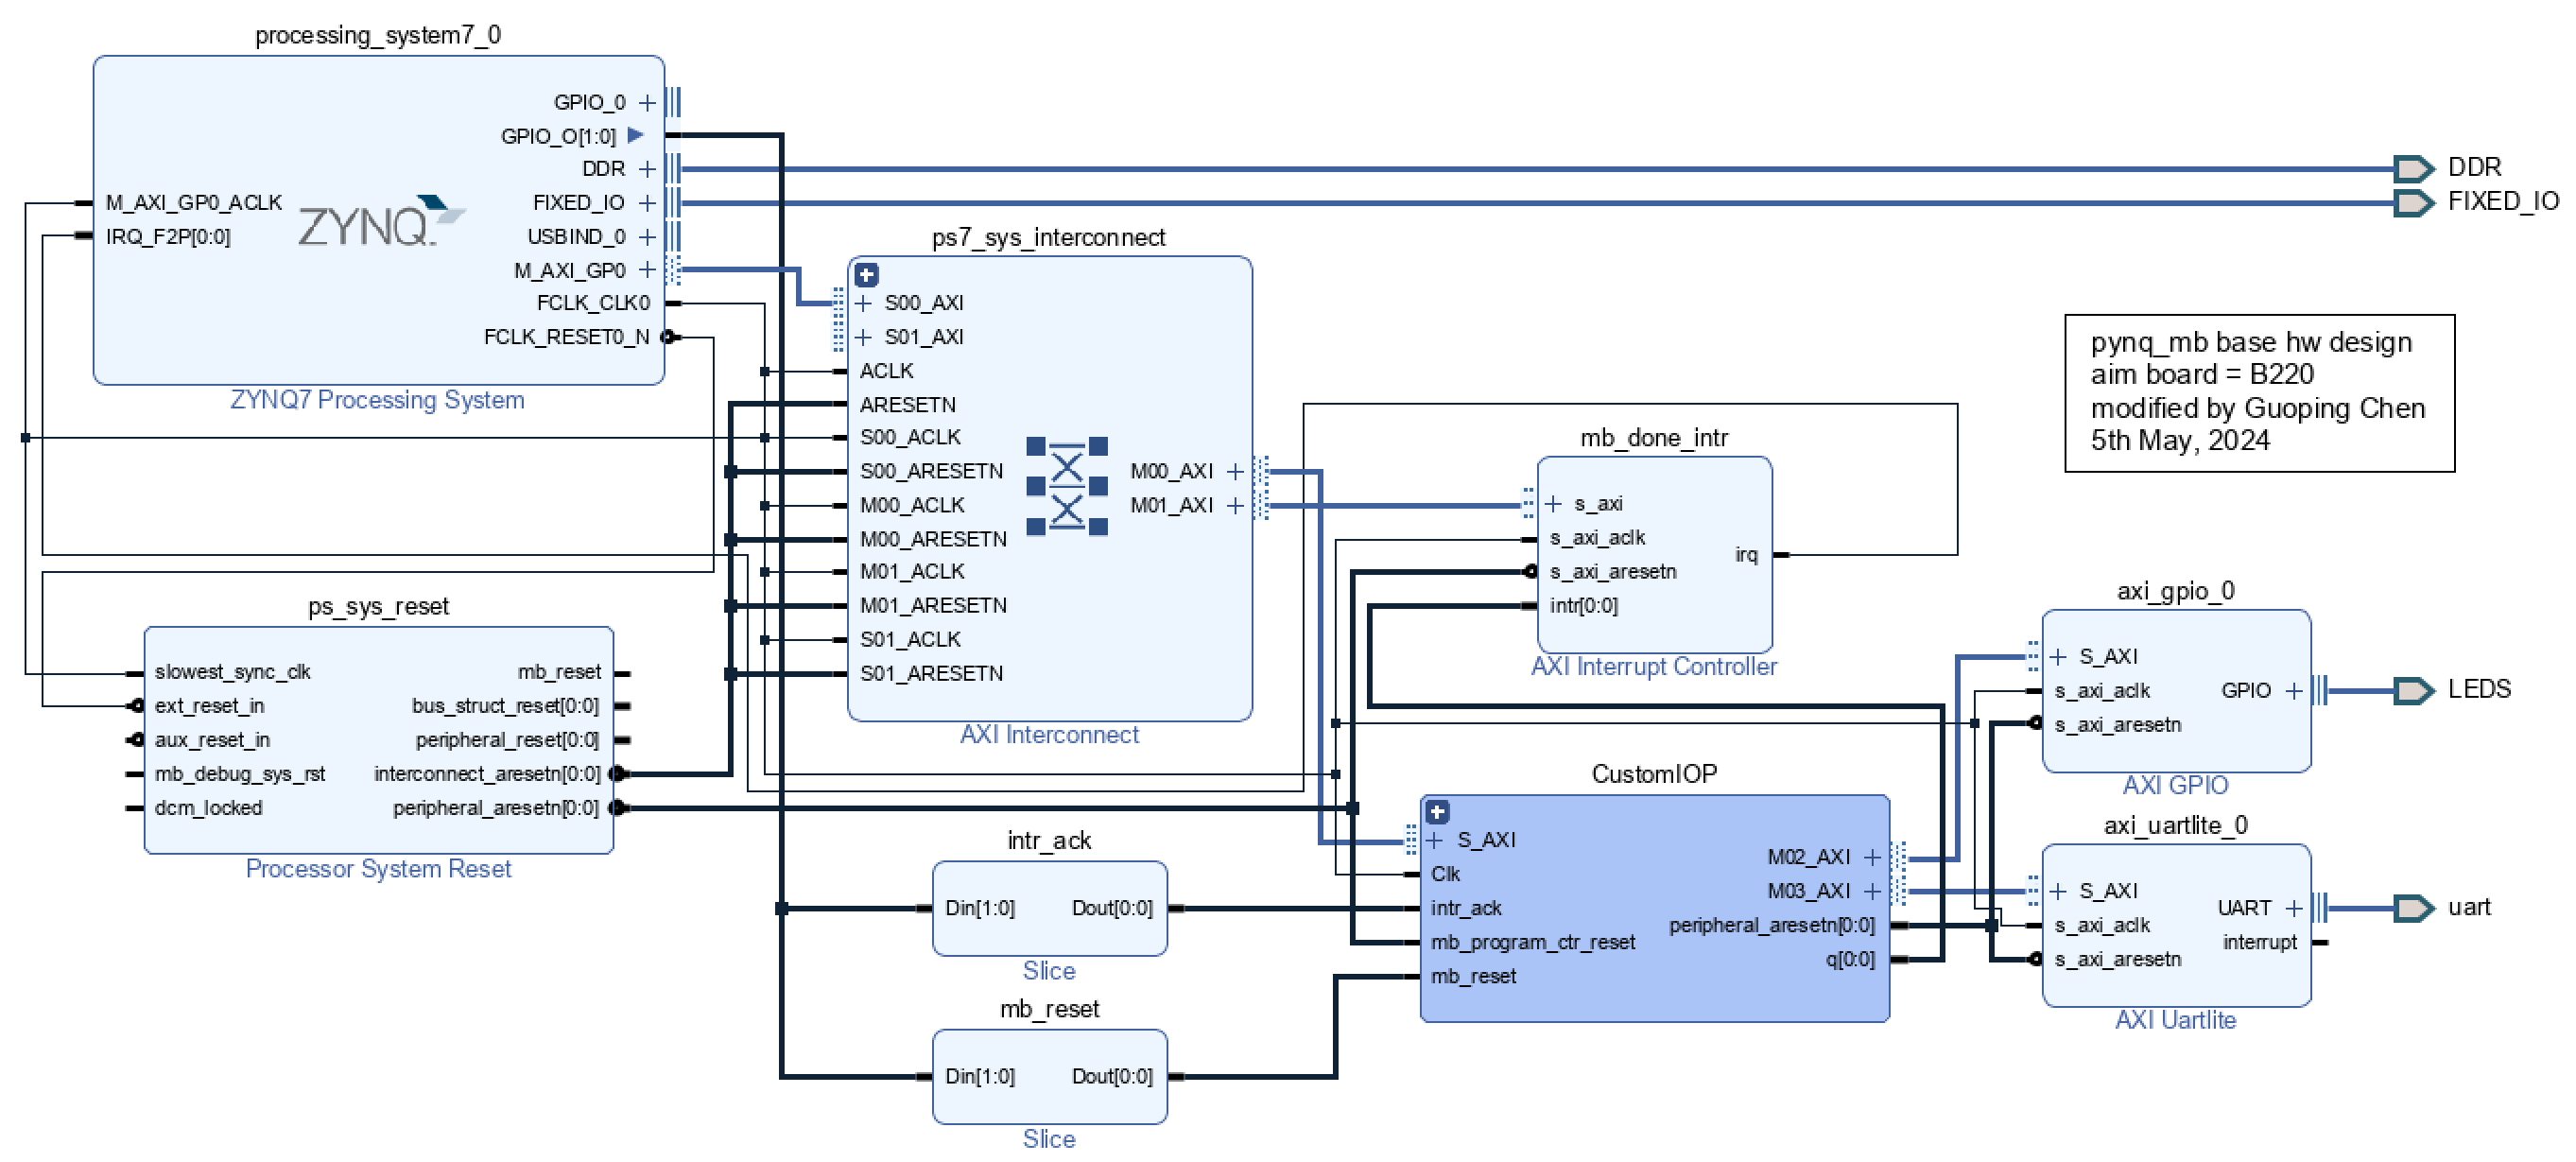
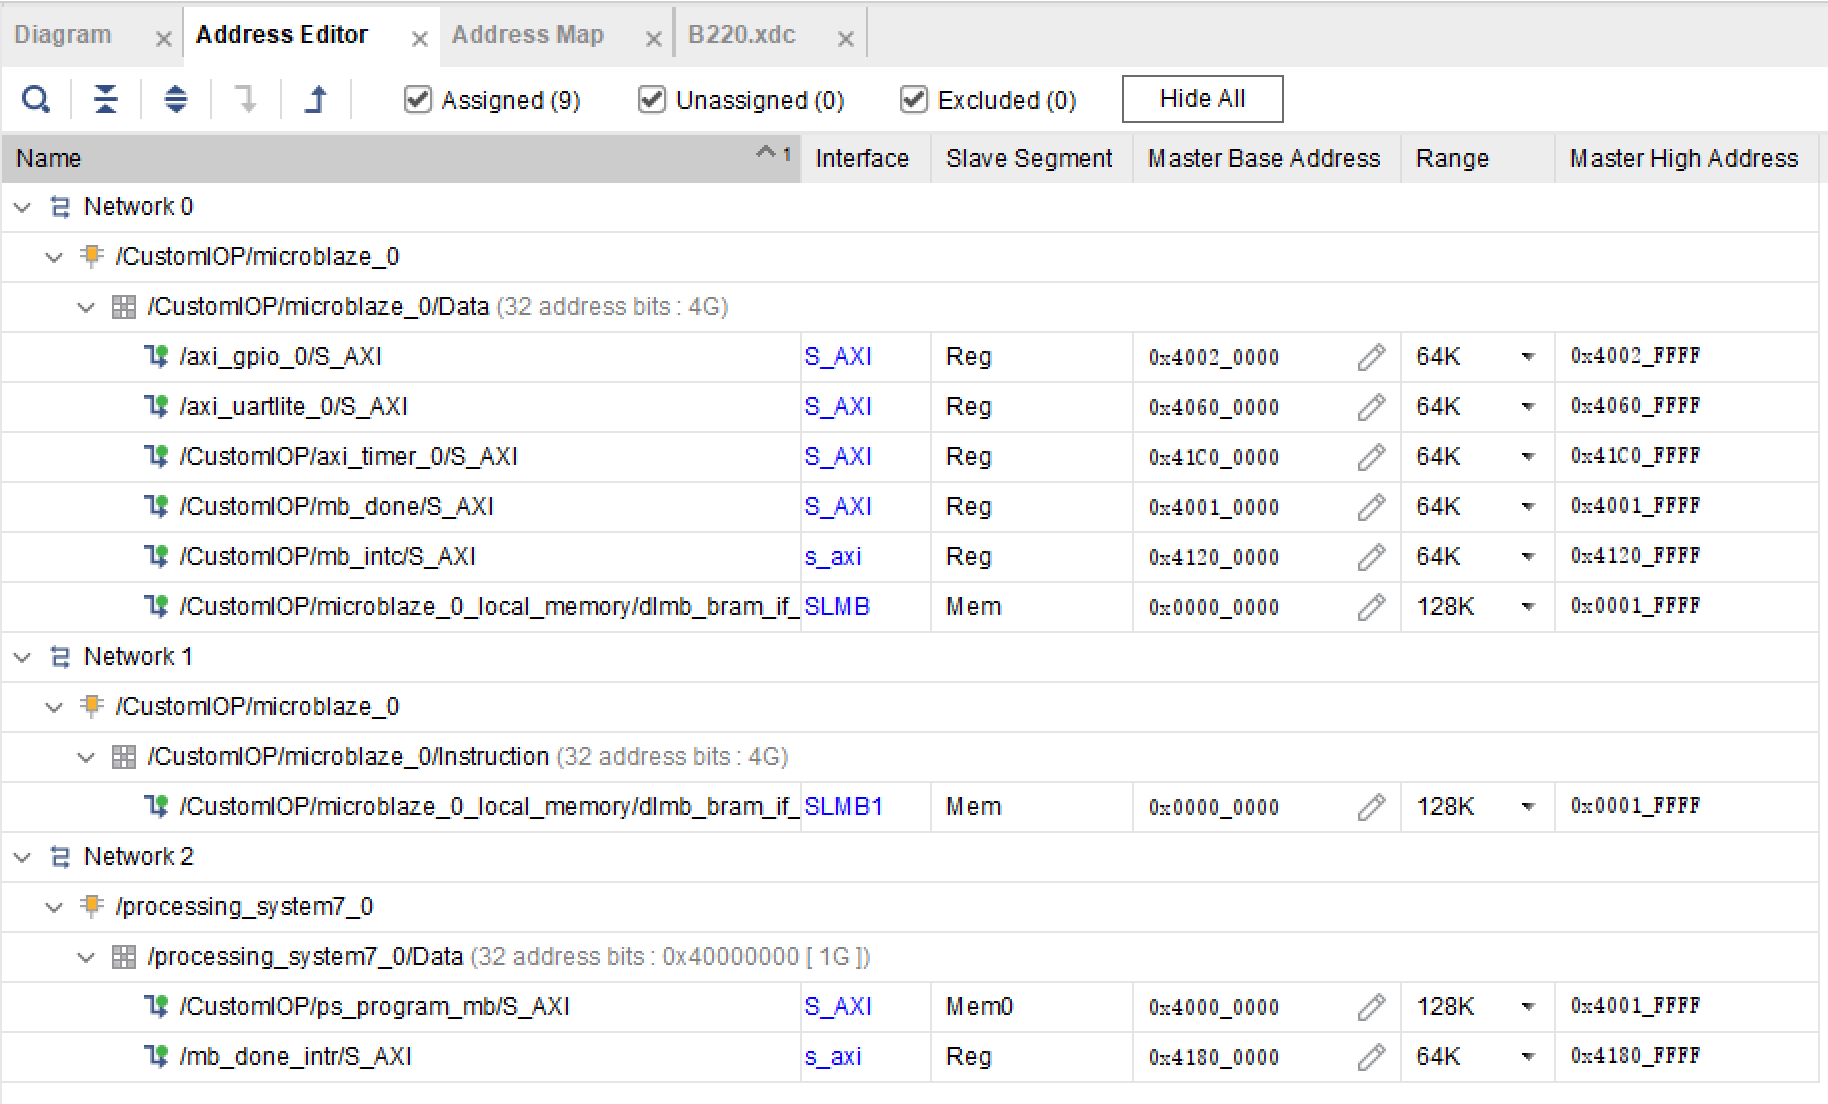

## 该设计的mb系统具有128k 数据和指令bram内存，并具有一个axi-timer和axi-uart,可以运行freertos

In [1]:
from pynq import Overlay

In [2]:
ol = Overlay('./overlay/mb_rtos.bit')

In [3]:
# ol.ip_dict

In [4]:
# ol.mem_dict

In [5]:
from pynq.lib import PynqMicroblaze

In [6]:
import time
class MB(PynqMicroblaze):
    def __init__(self, mb_info, mb_program):
        super().__init__(mb_info, mb_program)

    def write_mailbox(self, data_offset, data):
        offset = MAILBOX_OFFSET + data_offset
        self.write(offset, data)

    def read_mailbox(self, data_offset, num_words=1):
        offset = MAILBOX_OFFSET + data_offset
        return self.read(offset, num_words)

    def write_blocking_command(self, command):
        self.write(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET, command)
        while self.read(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET) != 0:
            pass
    def write_blocking_command_addr(self, addr, command):
        self.write(addr, command)
        while self.read(addr) != 0:
            pass        

    def write_non_blocking_command(self, command):
        self.write(MAILBOX_OFFSET + MAILBOX_PY2IOP_CMD_OFFSET, command)

In [7]:
customIOP = {
    'ip_name': ol.CustomIOP.description["memories"]["ps_program_mb"]["fullpath"], #'CustomIOP/axi_bram_ctrl_0',
    'rst_name': "mb_reset", #'mb_iop_pmoda_reset',
    'intr_pin_name': "CustomIOP/mb_done_intr/q", #'iop_pmoda/dff_en_reset_vector_0/q'
    'intr_ack_name': "intr_ack"#'mb_iop_pmoda_intr_ack'
    }

In [8]:
mb_info = customIOP

_mb = MB(mb_info, "main.bin")

In [9]:
MAILBOX_OFFSET = 0xF000
MAILBOX_SIZE = 0x1000
MAILBOX_PY2IOP_CMD_OFFSET = 0xffc
MAILBOX_PY2IOP_ADDR_OFFSET = 0xff8
MAILBOX_PY2IOP_DATA_OFFSET = 0xf00

WRITE_LED = 0x9
READ_LED = 0x23
TEST_CYCLE = 0X69

In [10]:
_mb.state

'RUNNING'

In [11]:
_mb.write_mailbox(0, 1)
_mb.write_blocking_command(WRITE_LED)

In [12]:
_mb.write_mailbox(0, 0)
_mb.write_blocking_command(WRITE_LED)
_mb.write_blocking_command(READ_LED)
_mb.read_mailbox(0x0)

0